## **MATH 4042U Project 2 - Using Support Vector Machines (SVM) to classify species of penguins**

The purpose of this project is to use the method of support vector machines (SVM) to create a classifier for species of penguins based on their physical measurements. There are three species of penguin in this dataset - Adelie, Chinstrap, and Gentoo penguins.

<br>

The four features of the data set are bill length (mm), bill depth (mm), flipper length (mm), and body mass (g).

In [311]:
# importing dataset and libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


data = pd.read_csv("penguins.csv")
display(data)


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181,3750
1,Adelie,39.5,17.4,186,3800
2,Adelie,40.3,18.0,195,3250
3,Adelie,36.7,19.3,193,3450
4,Adelie,39.3,20.6,190,3650
...,...,...,...,...,...
337,Gentoo,47.2,13.7,214,4925
338,Gentoo,46.8,14.3,215,4850
339,Gentoo,50.4,15.7,222,5750
340,Gentoo,45.2,14.8,212,5200


#### **(a) For each pair of features, produce a scatter plot of the data, categorized by species.**

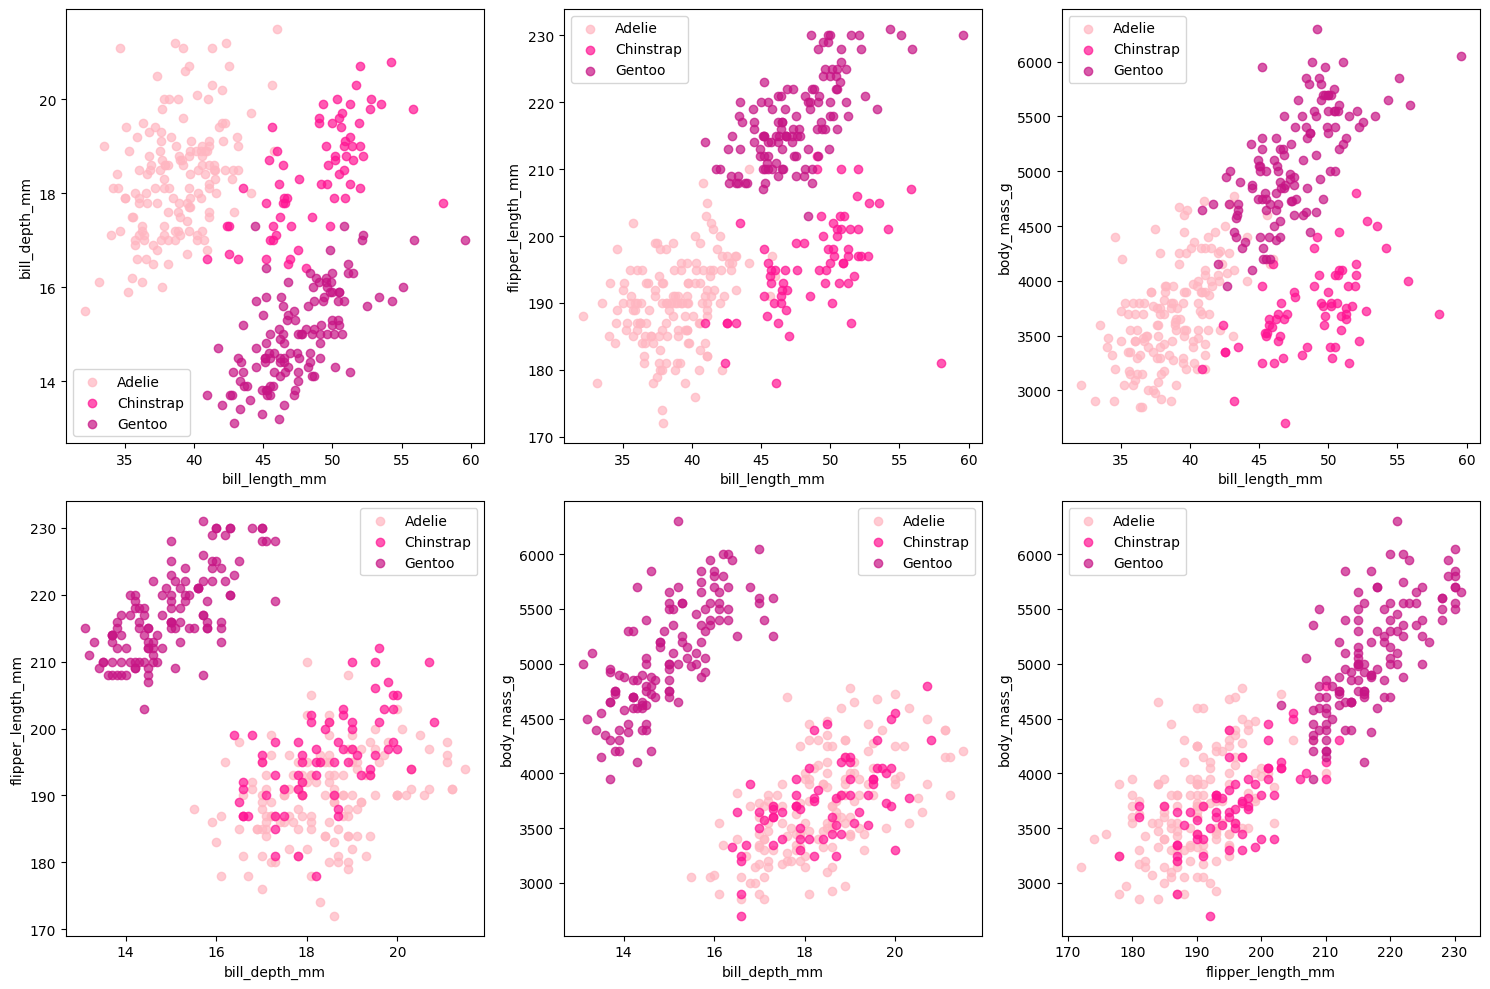

In [ ]:
# filtering data for each type of penguin

# adelie
adelie_data = data[data["species"] == "Adelie"]

# chinstrap
chinstrap_data = data[data["species"] == "Chinstrap"]

# gentoo
gentoo_data = data[data["species"] == "Gentoo"]


import matplotlib.pyplot as plt

# define feature columns and species column
f1 = "bill_length_mm"
f2 = "bill_depth_mm"
f3 = "flipper_length_mm"
f4 = "body_mass_g"

# all possible combinations of feature pairs
feature_pairs = [
    (f1, f2), (f1, f3), (f1, f4), 
    (f2, f3), (f2, f4), (f3, f4)]

# create subplots
fig, axes = plt.subplots(2,3, figsize=(15, 10))  # 2 rows, 3 columns

for ax, (x, y) in zip(axes.flatten(), feature_pairs):
    ax.scatter(adelie_data[x], adelie_data[y], color="lightpink", label="Adelie", alpha=0.7)
    ax.scatter(chinstrap_data[x], chinstrap_data[y], color="deeppink", label="Chinstrap", alpha=0.7)
    ax.scatter(gentoo_data[x], gentoo_data[y], color="mediumvioletred", label="Gentoo", alpha=0.7)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend()

plt.tight_layout()
plt.show()


#### **(b) For which of the pairs of features do the classes look linearly separable?**

The pair that looks the most linearly seperable is the bill length vs. bill depth. You can clearly see the difference between the three species. The only other two pairs that look linearly seperable are bill length vs. flipper length and body mass vs. bill length. The other three pairs overlap too much (in my opinion) to be linearly seperable. 

#### **(c) Split the data and the labels into training and testing sets.**


In [ ]:
# using the built in train test split from sklearn

features = data[["bill_length_mm", "bill_depth_mm","flipper_length_mm", "body_mass_g"]]
species = data["species"]

# using the built in sklearn train_test_split
features_train, features_test, species_train, species_test = train_test_split(features, species, test_size=0.2, random_state=42)
# test_size is the percentage of data used for testing (so 80% is used for training)

#### **(d) Apply SVM to *only* the features from part (b), and report the score on the test data.**

In [ ]:
# the pairs i thought looked separable in part (b)
separable_pairs = [
    ["bill_length_mm", "flipper_length_mm"],
    ["bill_length_mm","bill_depth_mm"],
    ["bill_length_mm", "body_mass_g"]]

# looping through each separable feature pair
for pair in separable_pairs:
    features_train_sep = features_train[pair]
    features_test_sep = features_test[pair]

    # performing svm for each pair
    clf=SVC(kernel="linear", C=1)
    clf.fit(features_train_sep, species_train)
    y_pred = clf.predict(features_test_sep)
    acc = accuracy_score(species_test, y_pred)
    print(f"Accuracy for features (separable) {pair}: {acc * 100:2f}%")

Accuracy for features (separable) ['bill_length_mm', 'flipper_length_mm']: 94.174757%
Accuracy for features (separable) ['bill_length_mm', 'bill_depth_mm']: 98.058252%
Accuracy for features (separable) ['bill_length_mm', 'body_mass_g']: 93.203883%


#### **(e) Now apply SVM to the entire dataset, and report the accuracy on the test data.**

In [315]:
# using the entire dataset

svm=SVC(kernel="linear", C=1)
svm.fit(features_train, species_train)
y_pred = svm.predict(features_test)
acc = accuracy_score(species_test, y_pred)
print(f"Accuracy: {acc * 100:2f}%")

Accuracy: 99.029126%


#### **(f) Finally, apply SVM to the training data limited to features for which, from your answer to parts (a) and (b), the classes do NOT look linearly separable**

In [ ]:
# the pairs i thought did not look separable
not_separable_pairs = [
    ["bill_depth_mm", "flipper_length_mm"],
    ["body_mass_g","bill_depth_mm"],
    ["flipper_length_mm", "body_mass_g"]]

# looping through each separable feature pair
for pair in not_separable_pairs:
    features_train_not_sep = features_train[pair]
    features_test_not_sep = features_test[pair]

    # performing svm for each pair
    clf=SVC(kernel="linear", C=1)
    clf.fit(features_train_not_sep, species_train)
    y_pred = clf.predict(features_test_not_sep)
    acc = accuracy_score(species_test, y_pred)
    print(f"Accuracy for features (not separable) {pair}: {acc * 100:2f}%")

Accuracy for features (not separable) ['bill_depth_mm', 'flipper_length_mm']: 83.495146%
Accuracy for features (not separable) ['body_mass_g', 'bill_depth_mm']: 78.640777%
Accuracy for features (not separable) ['flipper_length_mm', 'body_mass_g']: 83.495146%


#### **(g) Compare your answers from the previous three parts, and comment. What do you notice? Are you surprised by the results?**


For feature pairs that appear separable: 

- Accuracy for features (separable) ['bill_length_mm', 'flipper_length_mm']: **94.174757%**
- Accuracy for features (separable) ['bill_length_mm', 'bill_depth_mm']: **98.058252%**
- Accuracy for features (separable) ['bill_length_mm', 'body_mass_g']: **93.203883%**

<br>

For feature pairs that appear not separable: 

- Accuracy for features (not separable) ['bill_depth_mm', 'flipper_length_mm']: **83.495146%**
- Accuracy for features (not separable) ['body_mass_g', 'bill_depth_mm']: **78.640777%**
- Accuracy for features (not separable) ['flipper_length_mm', 'body_mass_g']: **83.495146%**

<br> 

Entire dataset:
- Accuracy: **99.029126%**

<br>

After performing SVM for various subsets of this dataset, I am not too surprised by the results. I initially thought that
- bill length vs. flipper length
- bill length vs. bill depth
- and bill length vs body mass

were the most linearly separable pairs after looking at the scatter plots in part (a) and the accuracy scores support this idea. Specifically, I thought that bill length vs. bill depth appeared to be the *most* linearly separable, which as you can see, out of all six pairs, that bill length vs. bill depth has the highest accuracy score. Additionally, it also follows that the remaining three pairs, which I thought weren't separable, had lower accuracy scores than the previous three by about 10%. 

The only thing that I was quite surprised about *initially* was how high the accuracy score was for the entire dataset, being 99%. Clearly, the pairs of features that weren't perfectly separable on their own, the model was able to achieve almost perfect classification of species when using the full set of features. This is quite fascinating, as you would initially think that one pair of clearly linearly separable features (such as bill length vs. bill depth) would have a higher accuracy than the overall score, but you can see that SVM benefits from using multiple features together (the entire dataset). 

This is because when working with the dataset using just bill length and bill depth, let's say you have a data point (penguin) that is difficult to classify. Potentially it's a bit of an outlier penguin, maybe smaller than average flippers with a larger bill length. In this case, it may be mistakenly classified to an incorrect species of penguin. But, when you use the entire dataset with all 6 features, now the model moves past bill length vs. bill depth, as it didn't help classify, and moves to different features which potentially are easier to classify the penguin. 

Therefore, by combining different features, SVM can find more complex decision boundaries and handle outliers/edge cases more effectively -- which explains why the overall dataset's accuracy score is the highest. 

#### **(h) You find a penguin in your backyard, and its measurements are**
**- bill length: 52mm**

**- bill depth: 15mm**

**- flipper length: 210mm**

**- body mass: 6000g**


**Which species is the penguin most likely to be?**

In [317]:
svm=SVC(kernel="linear", C=10)
svm.fit(features_train, species_train)
y_pred = svm.predict(features_test)
acc = accuracy_score(species_test, y_pred)
print(f"Accuracy: {acc * 100:2f}%")

penguin = [52,15,210,6000]
predicted_species = svm.predict([penguin])
print(predicted_species)
print(f"The penguin is most likely a {predicted_species[0]}")

Accuracy: 99.029126%
['Gentoo']
The penguin is most likely a Gentoo


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


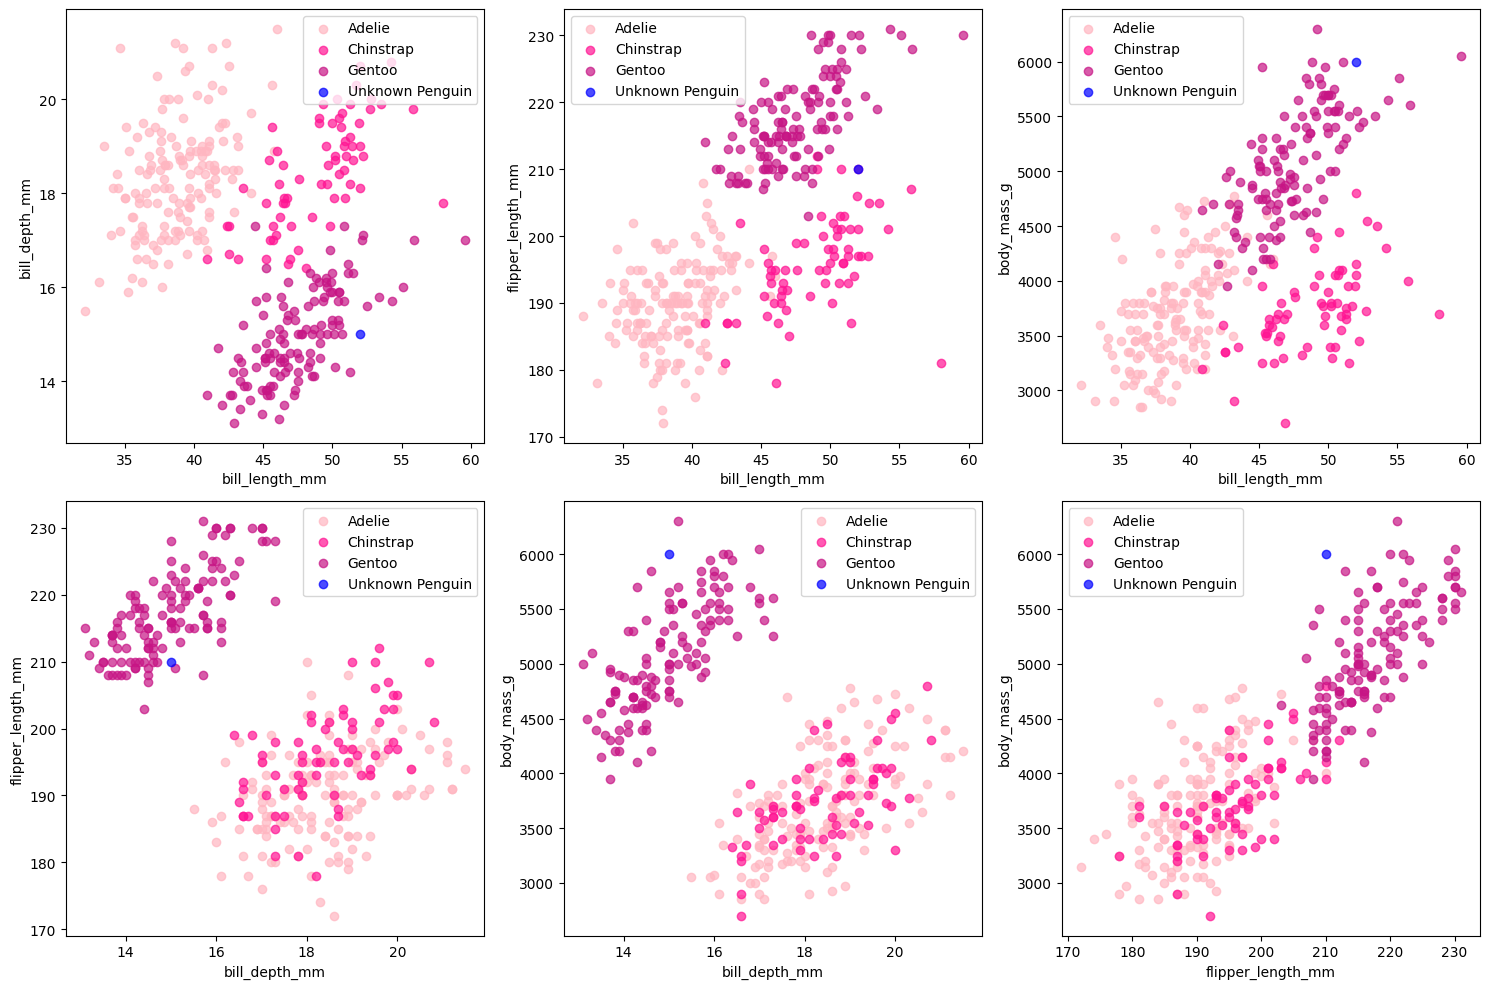

In [318]:
penguin = pd.DataFrame({
    "bill_length_mm": [52],
    "bill_depth_mm": [15],
    "flipper_length_mm": [210],
    "body_mass_g": [6000]
})

fig, axes = plt.subplots(2,3, figsize=(15, 10))  # 2 rows, 3 columns

for ax, (x, y) in zip(axes.flatten(), feature_pairs):
    ax.scatter(adelie_data[x], adelie_data[y], color="lightpink", label="Adelie", alpha=0.7)
    ax.scatter(chinstrap_data[x], chinstrap_data[y], color="deeppink", label="Chinstrap", alpha=0.7)
    ax.scatter(gentoo_data[x], gentoo_data[y], color="mediumvioletred", label="Gentoo", alpha=0.7)
    ax.scatter(penguin[x], penguin[y], color = "blue", label = "Unknown Penguin", alpha = 0.7)


    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend()

plt.tight_layout()
plt.show()

The model first predicted that the unknown penguin should be classified as a Adelie penguin. I wanted to make sure it was correct, so I plotted the unknown penguin (blue dot) against the other three species for all combinations of features. It is clear from the graphs tha the penguin should be classified as a Gentoo penguin, meaning there was probably an error in my code somewhere. After reading my code over and over again for a solid hour, it turns out I accidentally flipped `bill_length_mm` and `bill_depth_mm` when defining `features`. After fixing this error, the model predicted Gentoo, which is what we were initialy expecting. This is exactly the reason why you should always confirm your answers, because it's very easy to make a mistake somewhere!